<a href="https://colab.research.google.com/github/navyamodi30/T4/blob/main/T4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


<ipython-input-1-e75de84b32bf>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=data, palette='viridis')


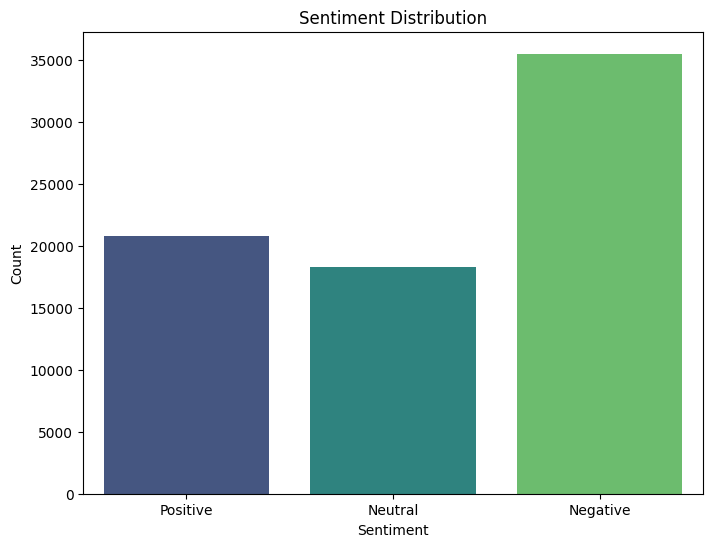

KeyError: 'text'

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Load the dataset
data = pd.read_csv('/content/twitter_training.csv')

# Check the first few rows
print(data.head())

# Perform sentiment analysis using TextBlob (Simple approach)
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity  # Returns polarity (-1 to 1)

# Add a 'sentiment' column based on the polarity
data['sentiment'] = data['Positive'].apply(get_sentiment)

# Classify sentiments as Positive, Neutral, or Negative based on polarity score
def sentiment_label(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_label'] = data['sentiment'].apply(sentiment_label)

# Visualize the distribution of sentiments
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=data, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Analyze sentiment trends over time (if a 'timestamp' or 'date' column exists)
# Assuming there is a 'timestamp' column with datetime data
if 'timestamp' in data.columns:
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data.set_index('timestamp', inplace=True)

    # Resample data to daily sentiment score (or use another time period like weekly)
    daily_sentiment = data.resample('D')['sentiment'].mean()  # Resample by day and calculate average sentiment
    plt.figure(figsize=(12, 6))
    daily_sentiment.plot()
    plt.title('Average Daily Sentiment Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Sentiment')
    plt.grid(True)
    plt.show()

# Sentiment analysis using VADER (for comparison)
sia = SentimentIntensityAnalyzer()

# Apply VADER sentiment analysis
data['vader_sentiment'] = data['text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify VADER sentiments as Positive, Neutral, or Negative
data['vader_sentiment_label'] = data['vader_sentiment'].apply(sentiment_label)

# Compare TextBlob and VADER sentiment distributions
plt.figure(figsize=(12, 6))
sns.countplot(x='vader_sentiment_label', data=data, palette='coolwarm')
plt.title('VADER Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Compare TextBlob vs VADER Sentiment
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_label', data=data, palette='viridis', label='TextBlob Sentiment')
sns.countplot(x='vader_sentiment_label', data=data, palette='coolwarm', label='VADER Sentiment')
plt.title('Comparison of TextBlob and VADER Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
